<a href="https://colab.research.google.com/github/kumargonuguntla/machine-learing_python/blob/main/project_464_Predictive_Modeling_for_Attorney_Involvement_in_Claims_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Updated_Claimants_Dataset.csv to Updated_Claimants_Dataset.csv


In [ ]:
# Load the Dataset
df = pd.read_csv('Updated_Claimants_Dataset.csv')

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


In [ ]:
df.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean
1339,34153,1,1.0,1.0,0.0,30.0,10548.36,Moderate,13522.19,1,11138.01,Third-Party,Clean


In [ ]:
# Check the shape of the dataset
df.shape


(1340, 13)

In [ ]:
# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [ ]:
# Check the missing values
df.isnull().sum()


,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [ ]:
#summary statistics
df.describe()


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()


,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [ ]:
# Check the shape of the dataset
df.shape


(1096, 13)

In [ ]:
df.duplicated().sum()

0

In [ ]:
numerical_columns=df.select_dtypes(include=['number']).columns
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Claim_Amount_Requested', 'Claim_Approval_Status',
       'Settlement_Amount'],
      dtype='object')


In [ ]:
# Unique values for categorical columns
categorical_columns = ['CLMSEX', 'Accident_Severity', 'Policy_Type', 'Driving_Record']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Unique values in CLMSEX:
CLMSEX
1.0    619
0.0    477
Name: count, dtype: int64

Unique values in Accident_Severity:
Accident_Severity
Minor       379
Severe      364
Moderate    353
Name: count, dtype: int64

Unique values in Policy_Type:
Policy_Type
Comprehensive    567
Third-Party      529
Name: count, dtype: int64

Unique values in Driving_Record:
Driving_Record
Minor Offenses    380
Clean             372
Major Offenses    344
Name: count, dtype: int64


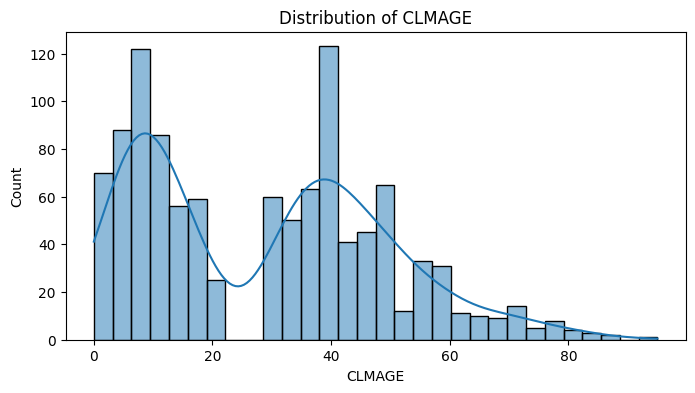

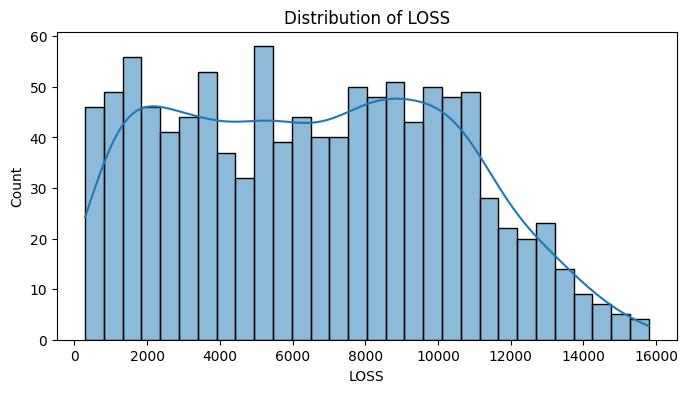

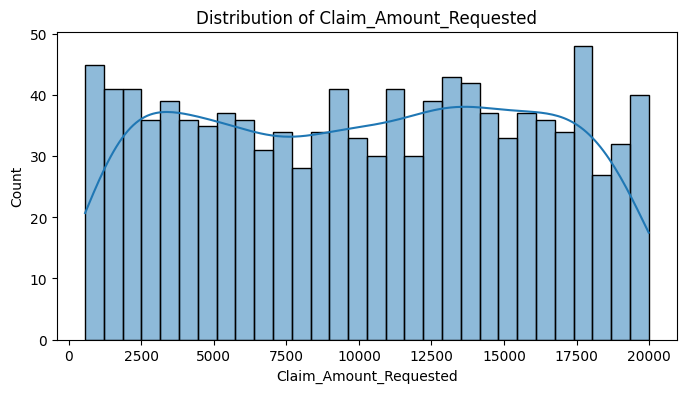

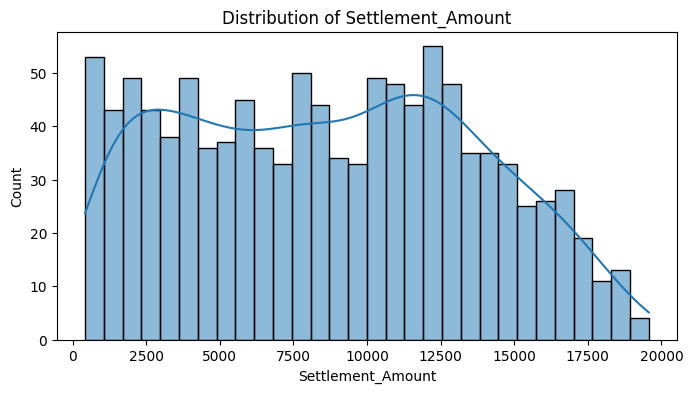

In [ ]:
# Visualizations
# Distribution of numerical features
numerical_columns = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


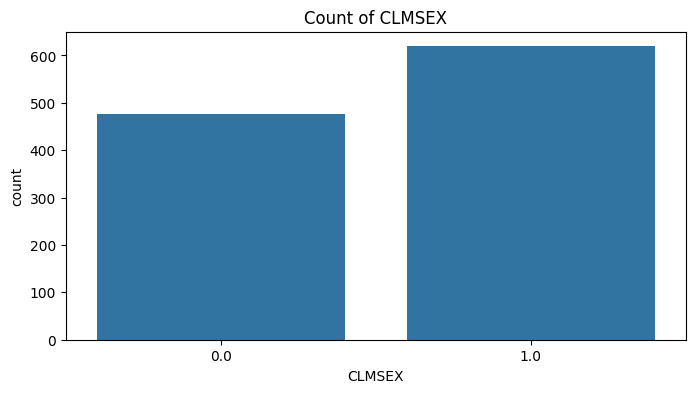

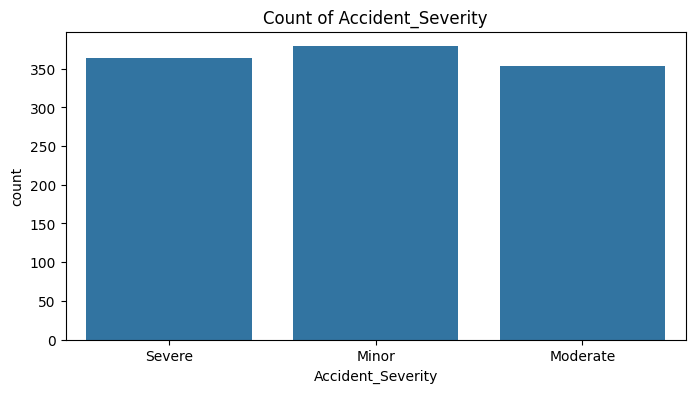

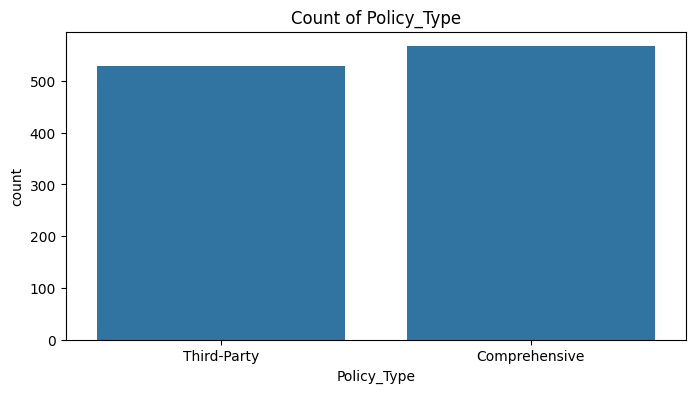

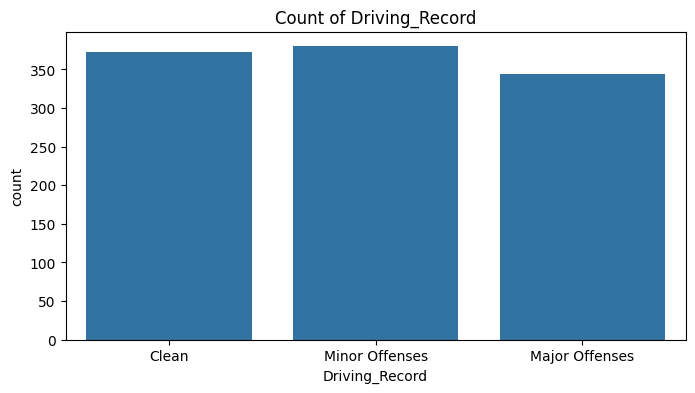

In [ ]:
# Bar plot for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()


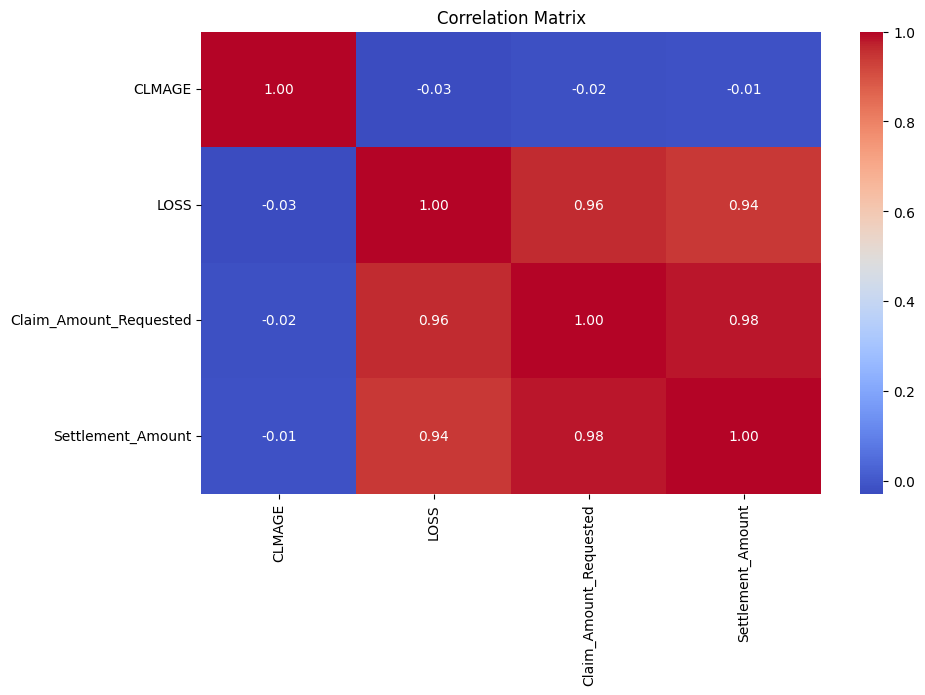

In [ ]:
# Correlation matrix for numerical features only
numerical_columns = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']
correlation_matrix = df[numerical_columns].corr() # Select only numerical columns for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


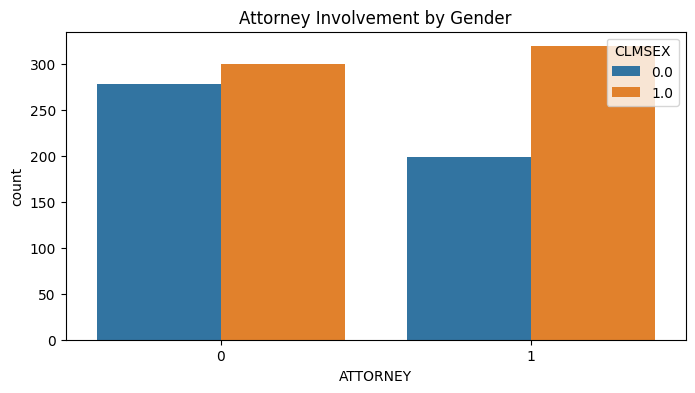

In [ ]:
# Relationship between ATTORNEY and other features
# Categorical variable example
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='ATTORNEY', hue='CLMSEX')
plt.title('Attorney Involvement by Gender')
plt.show()


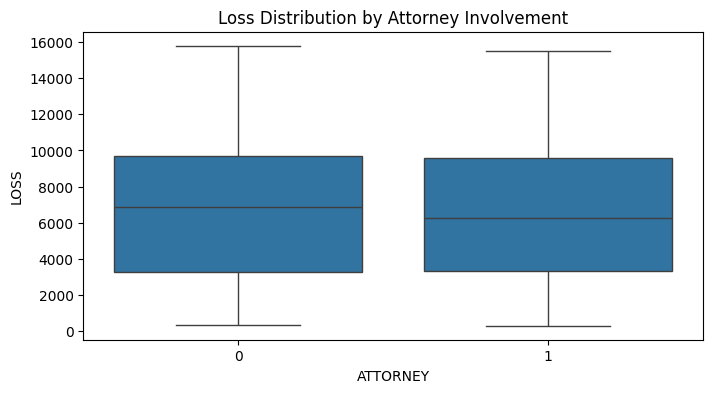

In [ ]:
# Numerical variable example
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='ATTORNEY', y='LOSS')
plt.title('Loss Distribution by Attorney Involvement')
plt.show()


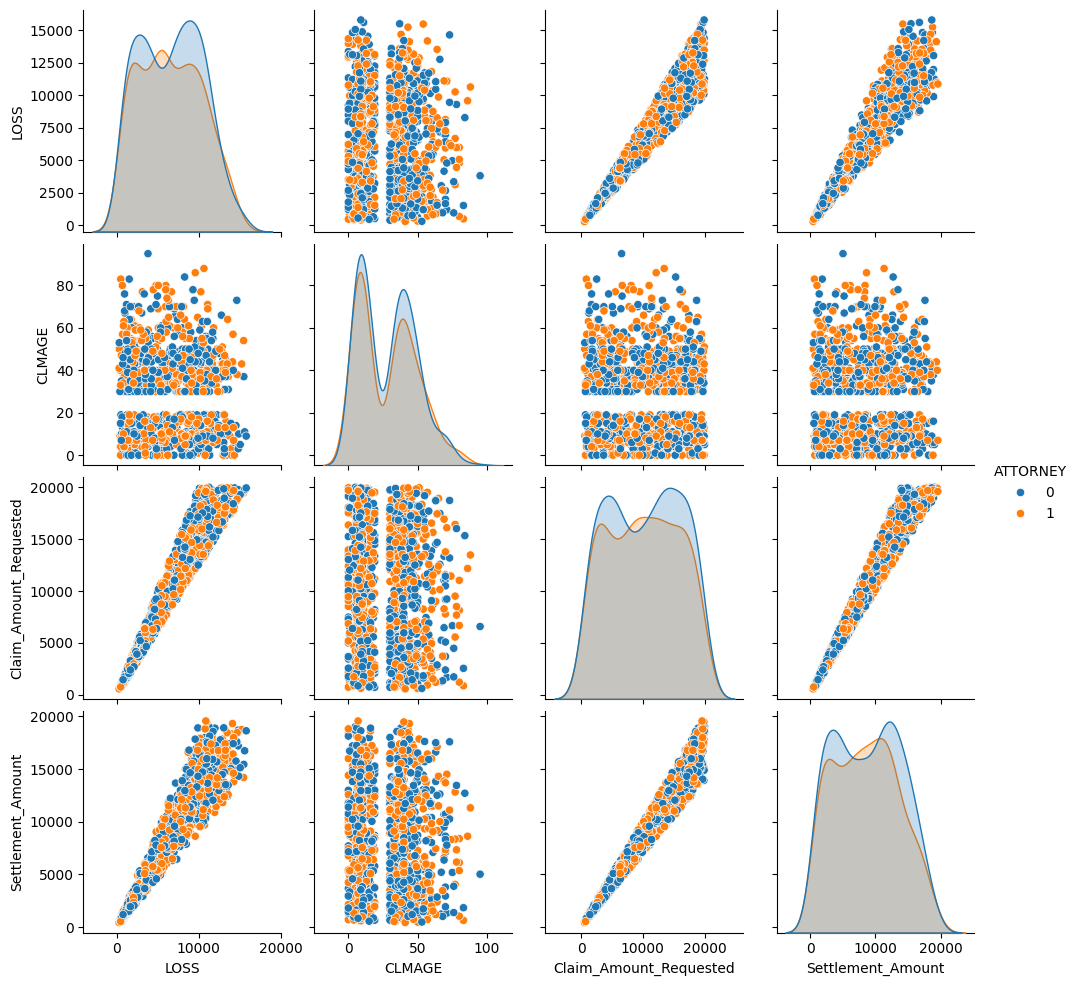

In [ ]:
# Pairplot for selected numerical features
selected_columns = ['LOSS', 'CLMAGE', 'Claim_Amount_Requested', 'Settlement_Amount', 'ATTORNEY']
sns.pairplot(df[selected_columns], hue='ATTORNEY')
plt.show()

##Balancing the Dataset
To handle imbalance in the ATTORNEY target variable, we can use SMOTE (Synthetic Minority Oversampling Technique) or undersampling.

###check balance

In [ ]:
from collections import Counter

# Check target variable distribution
print("Original Distribution of ATTORNEY:")
print(Counter(df['ATTORNEY']))


Original Distribution of ATTORNEY:
Counter({0: 578, 1: 518})


###Apply SMOTE for Oversampling

In [ ]:
!pip install pandas scikit-learn imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Assuming 'df' is your original DataFrame
# Separate features and target
X = df.drop(columns=['ATTORNEY'])
y = df['ATTORNEY']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through columns and encode if they are of type 'object'
for column in X.columns:
    if X[column].dtype == 'object':
        # Fit and transform the encoder on the column
        X[column] = encoder.fit_transform(X[column])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check balanced distribution
print("Resampled Distribution of ATTORNEY:")
print(Counter(y_resampled))

Resampled Distribution of ATTORNEY:
Counter({0: 578, 1: 578})


###Combine Resampled Data

In [ ]:
# Combine features and target into a new DataFrame
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['ATTORNEY'])], axis=1)

# Save balanced data
balanced_data.to_csv('balanced_dataset.csv', index=False)
print("Balanced dataset saved as 'balanced_dataset.csv'")


Balanced dataset saved as 'balanced_dataset.csv'


In [ ]:
# Compare the sizes of original and balanced datasets
print(f"Original dataset size: {df.shape}")
print(f"Balanced dataset size: {balanced_data.shape}")


Original dataset size: (1096, 13)
Balanced dataset size: (1156, 13)


## Feature Engineering
a. Encoding Categorical Variables
Convert categorical variables into numerical representations using One-Hot Encoding or Label Encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to columns with ordered categories
df['Accident_Severity'] = label_encoder.fit_transform(df['Accident_Severity'])
df['Policy_Type'] = label_encoder.fit_transform(df['Policy_Type'])
df['Driving_Record'] = label_encoder.fit_transform(df['Driving_Record'])

# If needed, use One-Hot Encoding
df = pd.get_dummies(df, columns=['Policy_Type', 'Driving_Record'], drop_first=True)


##Handling Missing Values
If your dataset has missing values, they must be addressed appropriately:

Numerical features: Use mean, median, or a custom value.
Categorical features: Use mode or create a new category, e.g., "Unknown."



In [ ]:
# Filling missing numerical values with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Filling missing categorical values with a new category - Accident_Severity only!
categorical_columns = ['Accident_Severity']  # Only include Accident_Severity
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

b. Feature Scaling
Standardize numerical variables to a similar scale for better model performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


##Creating New Features
Sometimes derived features improve model performance:

Interaction Terms: Combine features to uncover hidden patterns (e.g., LOSS / Settlement_Amount).

Binary Flags: Example: Claimants under 25 might have higher attorney involvement.

In [ ]:
# Feature: Ratio of LOSS to Settlement_Amount
df['Loss_Settlement_Ratio'] = df['LOSS'] / (df['Settlement_Amount'] + 1e-6)

# Feature: Age Group
df['Age_Group'] = pd.cut(df['CLMAGE'], bins=[0, 25, 50, 75, 100], labels=['Youth', 'Adult', 'Senior', 'Elder'])


c. Feature Selection:
Use techniques like correlation analysis or Recursive Feature Elimination (RFE) to reduce dimensionality.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# ... (your previous code) ...

# Encode 'Age_Group' using Label Encoding
label_encoder = LabelEncoder()
df['Age_Group_Encoded'] = label_encoder.fit_transform(df['Age_Group'])

# Drop the original 'Age_Group' column
df = df.drop(columns=['Age_Group'])

# Select top 8 features based on ANOVA F-value
X = df.drop(columns=['ATTORNEY'])
y = df['ATTORNEY']
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)

# View selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['CLMSEX', 'CLMINSUR', 'SEATBELT', 'Accident_Severity',
       'Claim_Approval_Status', 'Settlement_Amount', 'Policy_Type_1',
       'Loss_Settlement_Ratio'],
      dtype='object')


##Analyze importance through models or statistical tests.

Feature Importance with Random Forest:

In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# ... (your previous code) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # Adjust test_size and random_state as needed

# Train a quick Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Now X_train and y_train are defined



RandomForestClassifier(random_state=42)

# Model Training
a. Splitting the Dataset
Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ATTORNEY'])
y = df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#Training a Model
We can start with a simple classifier like Logistic Regression and then move to more advanced ones like Random Forest or XGBoost.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)


##Baseline Model
Start with a simple model to establish a baseline.

In [ ]:
from sklearn.dummy import DummyClassifier

# Baseline model: Predict majority class
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
baseline_accuracy = dummy.score(X_test, y_test)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")


Baseline Accuracy: 0.5289


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)


##Experimenting with Multiple Models
Here’s how to try different models:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression # Assuming LogisticRegression is defined elsewhere
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) # Now accuracy_score is defined
    print(f"{name}: Accuracy = {accuracy:.4f}")

Logistic Regression: Accuracy = 0.5380
Random Forest: Accuracy = 0.5684
Gradient Boosting: Accuracy = 0.5289
XGBoost: Accuracy = 0.5471


## **Model Evaluation**

### a. Metrics
Evaluate the model using metrics like Accuracy, Precision, Recall, and F1-Score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.547112462006079
Precision: 0.5202702702702703
Recall: 0.4967741935483871
F1-Score: 0.5082508250825083

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58       174
           1       0.52      0.50      0.51       155

    accuracy                           0.55       329
   macro avg       0.54      0.54      0.54       329
weighted avg       0.55      0.55      0.55       329



### b. Confusion Matrix
Visualize the confusion matrix to understand the performance in more detail

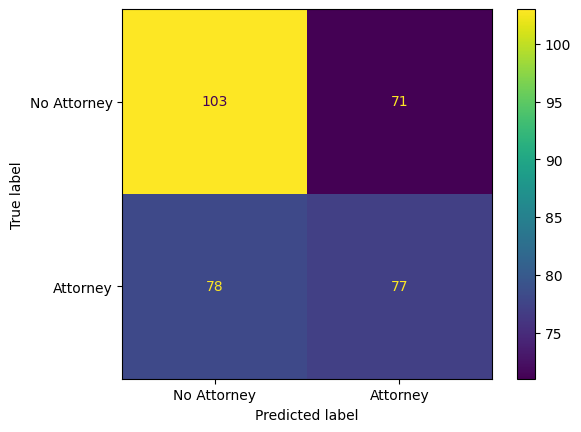

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Attorney', 'Attorney'])
plt.show()


##AUC-ROC Curve
Evaluate your model’s performance using the ROC curve, which captures true positive and false positive rates.

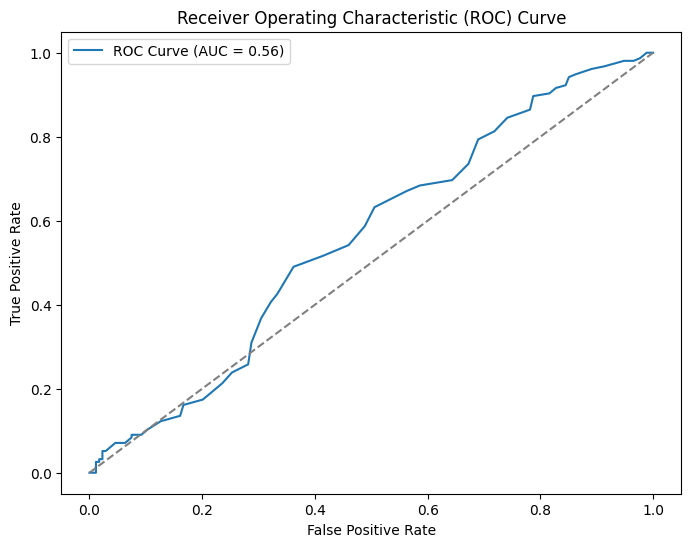

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


##Precision-Recall Curve
For imbalanced datasets, focus on Precision and Recall instead of Accuracy.

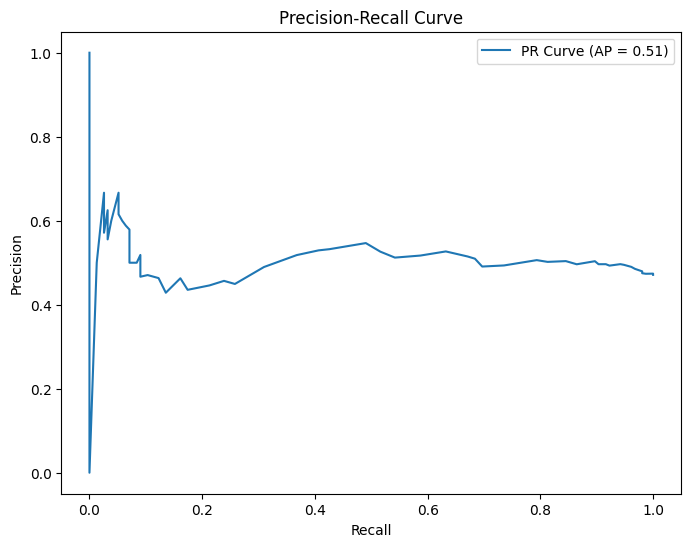

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Advanced: Hyperparameter Tuning
Use techniques like Grid Search or Random Search for hyperparameter optimization.

### Grid Search for Random Forest:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


##Hyperparameter Tuning in Detail
Random Search (Efficient for Large Spaces)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter space for Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Randomized search
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=20, scoring='f1', cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)


Best Parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 108}


###Grid Search (Exhaustive Search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


###Understanding Predictions
SHAP for Feature Contribution
Use SHAP (SHapley Additive exPlanations) to interpret model predictions.

In [ ]:
pip install shap


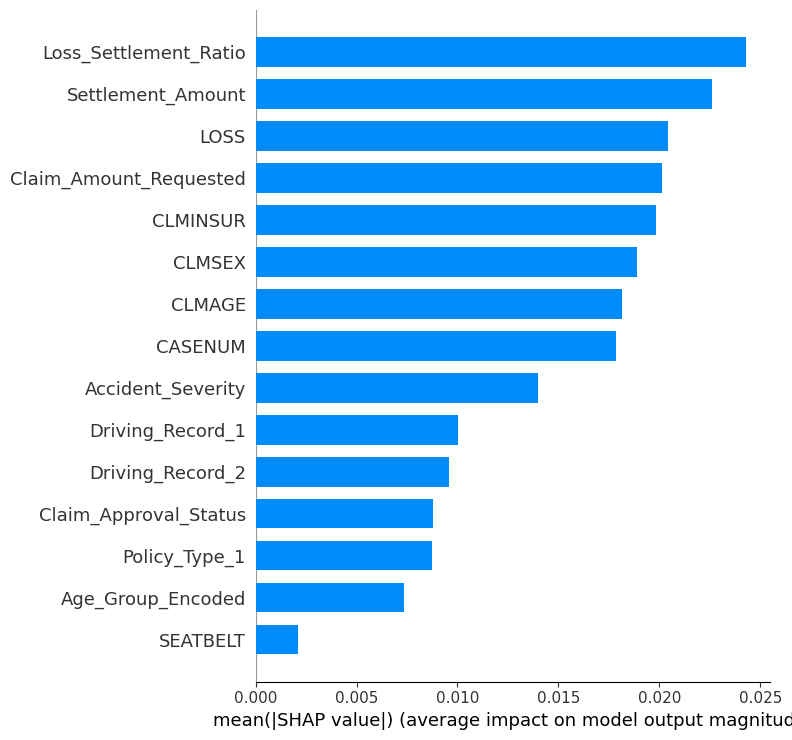

In [ ]:
import shap

# Initialize SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Select SHAP values for class 1 (assuming binary classification)
# Use shap_values[:, :, 1] to select all instances and all features for class 1
shap_values_class1 = shap_values[:, :, 1]

# Summary plot for class 1
shap.summary_plot(shap_values_class1, X_test, plot_type="bar")

###Comparing Models
Train Multiple Models
We’ll use a dictionary to streamline the process.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store results
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'AUC-ROC': auc}
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       174
           1       0.51      0.45      0.48       155

    accuracy                           0.54       329
   macro avg       0.53      0.53      0.53       329
weighted avg       0.54      0.54      0.54       329

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       174
           1       0.55      0.49      0.52       155

    accuracy                           0.57       329
   macro avg       0.57      0.56      0.56       329
weighted avg       0.57      0.57      0.57       329

--------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       174
           1       0.50      0.44      0.47       155

    acc

###Compare Results
Convert the results into a DataFrame for better visualization.

In [ ]:
import pandas as pd

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Sort by F1-Score (or another metric of interest)
results_df = results_df.sort_values(by='F1-Score', ascending=False)

# Display results
print(results_df)


                     Accuracy  F1-Score   AUC-ROC
Random Forest        0.568389  0.517007  0.557805
XGBoost              0.547112  0.508251  0.569744
Logistic Regression  0.537994  0.479452  0.541528
Gradient Boosting    0.528875  0.467354  0.508862
SVM                  0.528875  0.000000  0.493363


###Visualize Performance
Plot the metrics to compare models visually.

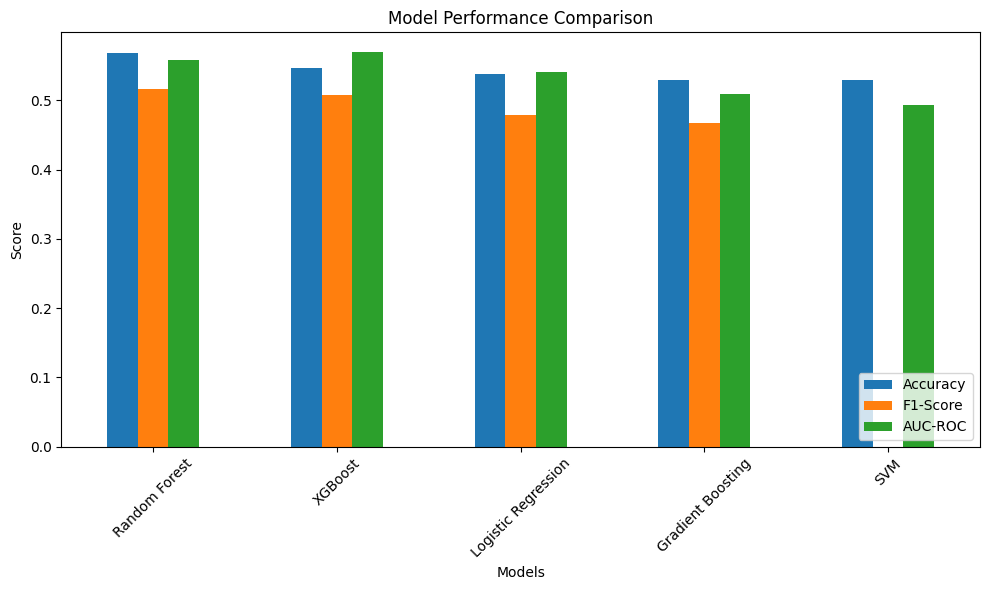

In [ ]:
import matplotlib.pyplot as plt

# Plot metrics for each model
results_df.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


##Selecting the Best Model
From the comparison, choose the model with the best F1-Score or AUC-ROC. If two models perform similarly:

Prefer simpler models (e.g., Logistic Regression) for easier interpretation.

Prefer ensemble models (e.g., Random Forest or XGBoost) for better performance in complex datasets.

###Advanced Optimization of the Best Model
Once the best model is identified, optimize its hyperparameters for better performance.

Example: Optimize XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


### Saving the Model
Save the trained model for deployment using joblib or pickle

In [ ]:
import joblib

joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'
